In [79]:
!pip install vaderSentiment

In [104]:
#Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
analyzer = SentimentIntensityAnalyzer()


# Twitter API Keys
consumer_key = "Ed4RNulN1lp7AbOooHa9STCoU"
consumer_secret = "P7cUJlmJZq0VaCY0Jg7COliwQqzK0qYEyUF9Y0idx4ujb3ZlW5"
access_token = "839621358724198402-dzdOsx2WWHrSuBwyNUiqSEnTivHozAZ"
access_token_secret = "dCZ80uNRbFDjxdU2EckmNiSckdoATach6Q8zb7YYYE5ER"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [106]:
target_user = ['@BBC', '@CBS', '@CNN', '@Fox', '@NYT']

In [107]:
df = pd.DataFrame({"@BBC":'',
                   "@CBS":'',
                   "@CNN":'',
                   "@Fox":'',
                   "@NYT":''}, index=[])
df.head()

,@BBC,@CBS,@CNN,@Fox,@NYT


In [108]:
# Loop through each news organization

for user in target_user:
    counter = 0
    
    # Loop through 100 tweets
    for status in tweepy.Cursor(api.user_timeline, id=user).items(100):
        
        # Extract text
        text = status.text
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(text)["compound"]
        
        # Add each value to the dataframe
        df.set_value(counter, user, compound)
        
        # Increment counter
        counter = counter + 1

In [109]:
df.head()

,@BBC,@CBS,@CNN,@Fox,@NYT
0,0,0,-0.2263,0.3818,-0.2023
1,0,0.6166,0,0.7569,0.2023
2,0,0.7096,-0.2732,0.7096,0
3,0.3612,0.296,-0.2263,0.765,0
4,0.3182,0,0.3182,-0.34,0


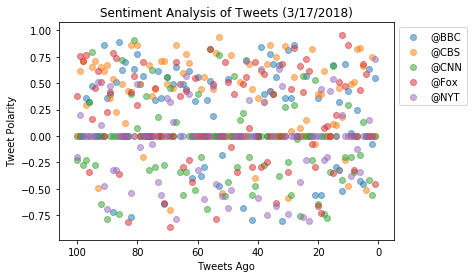

In [110]:
x = np.arange(100, 0, -1)
a = plt.scatter(x, df['@BBC'], alpha=0.5)
b = plt.scatter(x, df['@CBS'], alpha=0.5)
c = plt.scatter(x, df['@CNN'], alpha=0.5)
d = plt.scatter(x, df['@Fox'], alpha=0.5)
e = plt.scatter(x, df['@NYT'], alpha=0.5)
plt.title('Sentiment Analysis of Tweets (3/17/2018)')
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')
plt.gca().invert_xaxis()
plt.legend((a,b,c,d,e),('@BBC', '@CBS','@CNN', '@Fox', '@NewYorkTimes'),numpoints=1, loc='upper right', ncol=1, fontsize=8)
lgd = plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('Sentiment_scatter_plot.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [111]:
#find average of each news channel

df_mean = df.mean()

df_mean.head()

@BBC    0.167792
@CBS    0.303510
@CNN   -0.040881
@Fox    0.160958
@NYT   -0.036643
dtype: float64

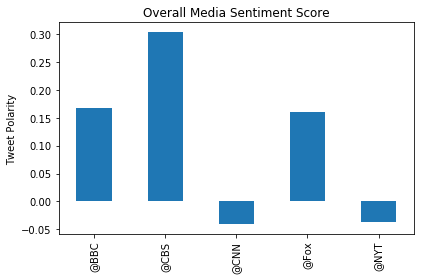

In [112]:
df_mean.plot(kind='bar')
plt.title('Overall Media Sentiment Score')
plt.xlabel('')
plt.ylabel('Tweet Polarity')
plt.savefig('Sentiment_Avg.png')
plt.tight_layout()
plt.show()

In [113]:
#THREE OBSERVABLE TRENDS BASED ON DATA:

# --- 1 CBS and BBC had the most positive sentiment score of all five news organizations in the data presented. Suprisingly, CNN and NYT got the most negative sentiments compared to Fox.
# --- 2 All five are almost at par in terms of tweet occurrence.
# --- 3 There's little to no pattern of negative or positive sentiment tweet occurrence at a particular timing.